# Creditworthiness of Caribbean Netherlands SMEs: measuring the financial ability and responsibility of SMEs in the Caribbean Netherlands to borrow and repay micro loans (Part2) #

### Introduction ###

**Research Context**

This is the followup to a project proposal **(Kenyatta, 2021)** I submitted as an assignment for the Data Programming in Python module at the University of London. My stated goal within the initial proposal was to develop a credit risk model that can be used by banks and financial institutions in the Caribbean Netherlands to "measure and score the financial ability and responsibility of SMEs" **(Kenyatta, 2021)** in repaying micro loans. The bank transactions of SME's would be the primary data used to train and evaluate the accuracy of such a credit risk model. Bank transactions are ideal because they offer a real time and ongoing insight into an individual's or business financial activities; particulary from a cashflow perspective. To that affect the bank transactions of TACT, an SME based in the Caribbean, was obtained, cleaned, explored and prepared for this next step.

<br>Following the initial project proposal, I carried out further research into the field of credit risk modelling for businesses. Traditionally banks and lending institutions use credit reports from external credit bureaus (e.g. TransUnion, Equifax, and Experian) in addition to financial statements when assessing the credit worthiness of [Micro, Small and Medium sized] businesses **(Astri, 2020)**. Essentially banks use this information to identify the probability of default (i.e. PD); the likelihood over a specified period, usually one year, that a borrower will not be able to make scheduled repayments **(Kenton, 2021)**. However, according to a report by the Hong Kong Applied Science and Technology Research Institute (i.e. ASTRI), "financial institutions seeking to assess the creditworthiness of MSMEs face a serious constraint and source of inefficiency in the lack of transparent management information available. Many banks prefer to lend to large enterprises rather than MSMEs because these enterprises are able to provide clear audited financial statements. It can be difficult for banks to evaluate MSMEs because they often do not have solid accounting systems in place" **(Astri, 2020)**. In the Caribbean Netherland this problem is exacerbated by the fact that most businesses are defined as micro or small enterprises. As such they are not required by NL GAAP to produce audited financial statements. 

<br>Alternative data sources are increasingly being used to overcome challenges in assessing the credit worthiness of MSMEs. During my research I discovered that "the use of bank transactions is [a] relatively new" concept and is seen as an "alternative data" source within the space of credit risk modelling **(Luber, 2021)**. This is according to Equifax, one of the largest consumer credit reporting agencies worldwide **(Luber, 2021)**. Alternative data also includes transactional data such as mobile phone usage, electricity consumption and social media data in addition to bank statements. The benefits of using alternative data for credit risk modeling include greater insights, data reliability, risk mitigation and continous monitoring. On the other hand, some key challenge in working with alternative data includes maintaining user privacy, the effort required in dataset feature engineering and in selecting the appropriate machine learning algorithms. On the last point, my research revealed that credit risk modelling has traditionally been seen as a classification problem; with a focus on identifying whether a user is likely to default or not. As a result, when it comes to applying machine learning algorithms to create traditional credit risk models, "logistic regression is considered the industry's practice" **(Verkade, 2018)**. However, my research also revealed that "there is no single answer to the question of which machine learning algorithm is best to use for alternative credit scoring" and that "model selection therefore needs to be an exploratory process involving the continuous evaluation of multiple machine learning models **(Astri, 2020)**." 


**Disclaimers**

As of present, I have not been able to obtain authorization to use the bank transactions of other SME's based in the Caribbean Netherlands. It is my intention to continue working on this project in the future and to utilize the bank transactions of other SMEs. Upon a brief review of the BES Personal Data Protection Act **(CBPBES,2021)** and GDPR rules **(EUR-Lex, 2021)**, I realize that special care and consideration need to go into how this data is obtained, processed and stored. The work needed here is outside of the scope of the project at this point in time. As such, an important disclaimer to make up front is that the analysis and results in this assigment are based on the bank transactions of a single SME business called TacT which I own and operate. With that said, I do hope to derive insights from exploring the dataset and applying machine learning modeling techniques. The hope is that the acquired insights and results can be applied to a larger more diverse dataset in the near future.

**Updated Project Objectives**

Based on the above research context and disclaimers, I aim to achieve the following objectives with this project;

a. Further engineer the dataset features for the purposes of applying appropriate machine learning algorithms
<br>b. Explore the dataset to determine whether it is fit for the chosen modeling techniques
<br>c. Make use of external altnerative data if available and where appropriate
<br>d. Explore and compare the accuracy of atleast two ML algorithms for credit risk modeling (e.g. regression vs classification)
<br>e. Evaluate project lessons learnt and discuss future work required



 

**Python Libraries**

Once again, Python will be used along with the following libraries to complete tasks including external data acquisition, feature set engineering, data visualization, model training and evaluation. Online documentation for the various libraries were accessed throughout the completion of this project. 

In [1590]:
import numpy as np
import pandas as pd
import datetime as dt
from scipy.stats import linregress
from scipy.optimize import curve_fit
import statsmodels.api as sm 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import seaborn as sns
from scipy import stats
%matplotlib inline

**Special Instructions**

To obtain the correct output, please run the cells in this jupyter notebook sequentially from top to bottom. 

**Version Control**

The code for this project can be found on my personal Github repository at https://github.com/KenyattaDaniel/project-score

### Feature Engineering ###
My research indicated that feature engineering although challenging, is important to derive value from alternative data used for credit risk modelling. Below I seek to add new features to the dataset utilizing my background in accounting. In particular, I'd like to add features that can assist in revealing cashflow timing patterns. 

**Dataset Import**
<br>Below I import the summarized transactions (i.e. sumtrans) dataset created during the initial project **(Kenyatta, 2021)**. The sumtrans dataset contains the daily summarized bank transactions of my firm TACT throughout 2020. 

In [1591]:
sumtrans = pd.read_csv("data/sum_bank_trans.csv")

**Dataset Features Explained**
<br>A short description of the dataset features are provided below;<br>
<br>0. <u>postdate</u> = the transactions date by year-month-day
<br>1. <u>uniquetypes</u> = a description of the unique transcations type per date
<br>2. <u>numuniquetypes</u> = the number of unique transcations types per date
<br>3. <u>numdebits</u> = the number of debit transcations per date (i.e. number of payments made)
<br>4. <u>numcredits</u> = the number of credit transcations per date (i.e. number of payments received)
<br>5. <u>sumdebits</u> = a total or summary of all debit amounts per date (i.e. total of payments made)
<br>6. <u>sumcredits</u> = a total or summary of all credit amounts per date (i.e. total of payments received)
<br>7. <u>sumdiff</u> = the difference between total debits and credits per date
<br>8. <u>repayposs</u> = indicates whether cashflow was positive 1 or negative 0 per date
<br>9. <u>repayscore</u> = arbitrary cashflow scoring system with 0 meaning negative cashflow and 5 meaning highest positive cashflow per date

Below I provide an overview of the sumtrans dataset at present.

In [1592]:
sumtrans.head()

,postdate,uniquetypes,numuniquetypes,numdebits,numcredits,sumdebits,sumcredits,sumdiff,repayposs,repayscore
0,2020-01-02,['DEBIT NOTE'],1,2.0,NaN,573.6,NaN,-573.6,0,0
1,2020-01-03,['DEBIT NOTE' 'C/A ATM/TB TRANSFER CR'],2,3.0,1.0,236.6,565.0,328.4,1,2
2,2020-01-06,['CUSTOMER DEPOSIT'],1,NaN,1.0,NaN,2290.0,2290.0,1,5
3,2020-01-07,['CREDIT NOTE' 'CUSTOMER DEPOSIT'],2,NaN,2.0,NaN,2540.0,2540.0,1,5
4,2020-01-09,['C/A ATM/TB BILL PAYMENT DT'],1,1.0,NaN,1000.0,NaN,-1000.0,0,0


In [1593]:
sumtrans.shape

(134, 10)

**Remove Unecessary Features**
<br>Below I remove the uniquetypes feature. My intention is to apply classification algorithms (i.e. logistic regression) to the dataset features. This will not work with features that contain categorical data such as uniquetypes. I did consider applying one-hot encoding to the uniquetypes feature to convert it to numerical data. However I decided against this because the combination of the numuniquetypes, numdebits and numcredits features provide essentially the same information.

In [1594]:
# First make copy of existing dataset
sumtrans2 = sumtrans.copy()

# Drop uniquetypes feature
sumtrans2.drop(columns=['uniquetypes'], inplace=True)

**Rename Existing Features**
<br>I would like to rename certain features to better describe the data records they contain.

In [1595]:
# Define new column names to replace existing one
newnames = {"postdate" : "transdate", "numuniquetypes": "numtranstypes", 
            "repayposs": "cashresult", "repayscore" : "cashscore" }

sumtrans2.rename(columns=newnames, inplace=True)

**Handling Features with NaN Values**
<br>The numdebits, numcredits, sumdebits and sumcredit should not contain NaN values. For example, if there were zero credit transactions on a day, this is better represented as a 0 value within the numcredits feature and a 0.0 value within the sumcredits feature instead of NaN. 

In [1596]:
# Fill all NaN values with 0
sumtrans2.fillna(0,inplace=True)

**Changing Feature Data Types**
<br>I noticed that the numdebits and numcredits features contain float values. The values in these features would better be represented as integer values. For example, it's not possible to have 1.5 or 3.75 debits in a day. 

In [1597]:
# Change numdebits and numcredits data type to integer
sumtrans2['numdebits'] = sumtrans2['numdebits'].astype(int)
sumtrans2['numcredits'] = sumtrans2['numcredits'].astype(int)

**Add New Date Features**

In [1598]:
# Convert transdate feature from string to datetime
sumtrans2["transdate"] = pd.to_datetime(sumtrans2['transdate'])

# Create new date related features
transmonth = sumtrans2["transdate"].dt.month
transday = sumtrans2["transdate"].dt.day

# Insert new features into dataset
sumtrans2.insert(1,"transmonth",transmonth)
sumtrans2.insert(2,"transday",transday)


**Add New Transaction Index Feature**

In [1599]:
# Store transaction index values in variable
transindex = pd.Series(sumtrans2.index)

# Insert new feature into dataset
sumtrans2.insert(1,"transindex",transindex)

**Add New Cash Balance Feature**
<br>Below I added a new feature with shows a accumlating balance of the sumdiff feature

In [1600]:
cashbalance = sumtrans2['sumdiff'].cumsum()

# Insert new feature into dataset
sumtrans2.insert(10,"cashbalance",cashbalance)

**Preview of Sumtrans2 Dataset**
<br>We should now have a more feature rich and appropriate dataset to work with.

In [1601]:
sumtrans2.head()

,transdate,transindex,transmonth,transday,numtranstypes,numdebits,numcredits,sumdebits,sumcredits,sumdiff,cashbalance,cashresult,cashscore
0,2020-01-02,0,1,2,1,2,0,573.6,0.0,-573.6,-573.6,0,0
1,2020-01-03,1,1,3,2,3,1,236.6,565.0,328.4,-245.2,1,2
2,2020-01-06,2,1,6,1,0,1,0.0,2290.0,2290.0,2044.8,1,5
3,2020-01-07,3,1,7,2,0,2,0.0,2540.0,2540.0,4584.8,1,5
4,2020-01-09,4,1,9,1,1,0,1000.0,0.0,-1000.0,3584.8,0,0


### Model Exploration and Selection ###

I'd like to explore the dataset to determine the most appropriate ML algorithms that can be applied to determine the credit risk that TacT represents; primarily from a cashflow perspective. Looking at the features of the dataset, I believe that the cashbalance feature can serve as the outcome value using linear regression analysis. Additionally, the cashresult feature can serve as the outcome value using logistic regression analysis. The plots used in this section were prepared with help from Jupyter Notebooks shared in the Statistics and Statistical Mining module **(Sadawi, 2021)**.

**Linear Regression**
<br>Logistic regression is a classification ML algorithm typically used in developing credit risk models. However, I'm curious to explore whether a regression ML algorithm could be applicable from a perspective of predicting cash balance; particularly in determining whether a positive linear relationship exists between an increase in transaction days and accumulated cash balance. This could indicate to a lender that TacT is generating more cash than it is spending and has the ability to afford loan repayments.

**Select Predictor and Outcome Variables**

In [1654]:
# the dataset index values are selected as the independent x variables
x = sumtrans2['transindex']
# cashbalance figures are selected as the dependent y variables
y = sumtrans2['cashbalance']

Below we define a function to easily plot a scatter graph of our x and y variables.

In [1657]:
def scatter(x,y,xlabel,ylabel,marker='x',label=y.name):
    """Returns a scatter plot of x and y variables"""
    plt.figure(figsize=(5,5), dpi=100)
    plt.plot(x, y, marker, label=label)
    plt.xlabel(xlabel) 
    plt.ylabel(ylabel) 
    plt.legend()
    return plt.show()

**Plot Scatter Graph**
<br>The results of the below scatter graph suggests a positive correlation exists between the independent x and dependent y variables. This means that only considering TacT's 2020 transactions days, the company's accumulated cash steadily increased from less than 0 to over $35k during a 12 month period. This could suggest good cashflow management and the ability to handle payment obligations. No correlation would essentially represent a stable cash balance or average performance. Finally, if the results had show a negative correlation this would suggest a decreasing cash balance and poor cashflow management. 

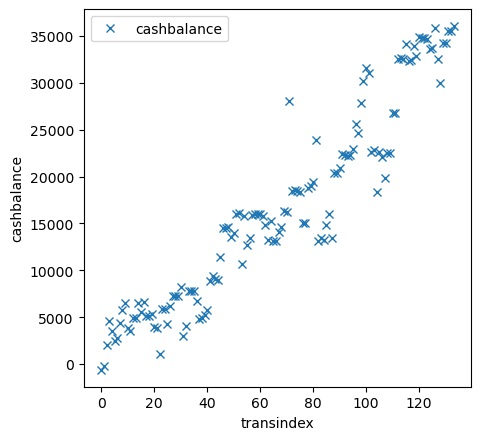

In [1658]:
scatter(x,y,x.name,y.name)

**Model Linear Regression Relationship**
<br>Below we model the linear relationship between the x and y values using the algebraic expression of y = a + bx.

In [1650]:
b, a, r_value, p_value, std_err = linregress(x, y)

The below equation shows that with every transaction day (X) during 2020, TacT's cash balance increased by US255 (B). The intercept value of -US344 (A) is present because the first two transaction days of 2020 result in a negative cash balance of -US573.6 and -US245.2 respectively. This is because TacT's 2019 ending balance has been excluded from the dataset. This approach demonstrates that the business is able to rely on cash generated from it's operations versus reserves in order to meet its obligations.

In [1651]:
print("The linear relationship between X and Y values can summed up in the following equation;")
print("Y", "=", str(a), "or A", "+", str(b), "or B", "*", "X")

The linear relationship between X and Y values can summed up in the following equation;
Y = -344.7835223880684 or A + 255.2459658848615 or B * X


**Plot Linear Equation as Line of Best Fit**
<br>Below we store our defined linear equation in the yhat variable. We pass this variable to our scatter function and plot the equation as a line of best fit.

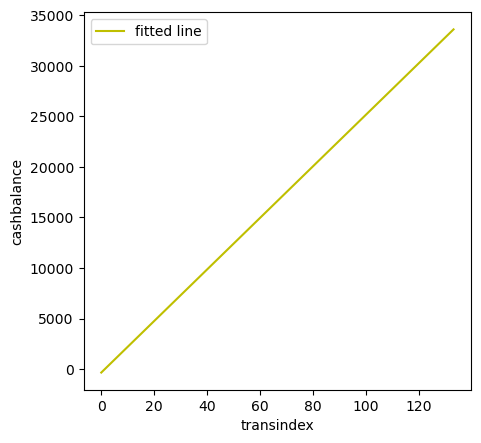

In [1659]:
yhat = a + b*x
scatter(x,yhat,x.name,y.name, marker='y',label='fitted line')

**Standardize Variables**
<br>Below we define a function **(Kenyatta, 2021)** to standardize our x and y variables; which currently have very different scale ranges. x values range from 0 to 133 whereas y values range from -573.6 to 36,001.85. Standardizing these variables will provide us with more meaningful metrics later on including a normalized root mean square (RMSE) statistic.

In [1660]:
def standardize(values):
    """Returns a copy of array with standardized values"""
    try:
        mean = np.mean(values)
        std = np.std(values)
        centreValues = values.apply(lambda v: (v-mean)/std)
        return centreValues
    except ValueError as ve:
        print('Feature values passed to standardize function should contain only one element')

In [1661]:
# WARNING! We are replacing x and y variables defined above
# Standardize x and y variables
x = standardize(x)
y = standardize(y)

In [1662]:
# WARNING! We are replacing b, a, r_value, p_value and std_err variables defined above
# Create standardized linear regression model
b, a, r_value, p_value, std_err = linregress(x, y)

In [1663]:
print("The standardized linear relationship between X and Y values can summed up in the following equation;")
print("Y", "=", str(a), "or A", "+", str(b), "or B", "*", "X")

The standardized linear relationship between X and Y values can summed up in the following equation;
Y = 2.6935070140152357e-18 or A + 0.9492036267893249 or B * X


**Plot Line of Best Fit Against Actuals**
<br>The linear equation defined above is below plotted to visualize the line of best fit. Visually, we can see that the fitted line generally captures the trajectory of the increasing cash balances. However, there appears to be several large differences between the actual and predicted results.

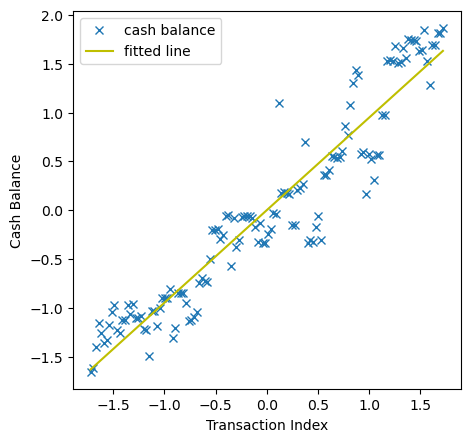

In [1664]:
plt.figure(figsize=(5,5), dpi=100)
plt.plot(x, y, 'x', label='cash balance')
plt.plot(x, a + b*x, 'y', label='fitted line')
plt.xlabel('Transaction Index') 
plt.ylabel('Cash Balance') 
plt.legend()
plt.show()

**Key Statistical Measures**
<br>Below we commute key statistics that help us better understand the linear relationship defined above.

<u>Correlation</u>
<br>There is a strong positive correlation between x and y variable denoted by an r value of 0.95. Furthermore the coeffecient of determination or r squared suggest that 90% of the variations in variable x causes variation to occur in variable y. 

In [1665]:
#Print correlation coeffecient
print("Correlation co-effecient (r value):", r_value)
print("Coeffecient of determination (r squared):", r_value**2)

Correlation co-effecient (r value): 0.9492036267893249
Coeffecient of determination (r squared): 0.900987525110008


The relationships between our x and y variables in addition to the other dataset features are captured in the correlation matrix vizualized below.

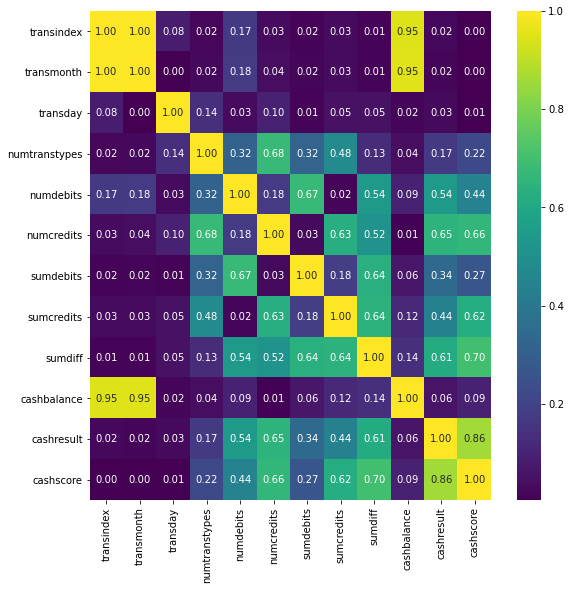

In [1666]:
plt.figure(figsize=(9,9))
sns.heatmap(np.abs(sumtrans2.corr()), annot=True, cmap="viridis", fmt="0.2f");

<u>Errors</u>
<br>Below we store our y predictions in the yhat variable. We then calculate the errors or residuals which are our y variables minus our y predictions. The errors are then squared (SE) and averaged (MSE) before find their square root (RMSE). One way to assess how well a regression model fits a dataset is to calculate the root mean square error, which tells us the average distance between the predicted values from the model and the actual values in the dataset **(Zach, 2021)**. An RMSE value of 0 would indicate the model perfectly fits the data and 1 would indicate the opposite. 

In [1667]:
# Define variable to store predictions
yhat = a + b * x
# Store residual errors
errors = y - yhat
# Calculate Squared Error
SE = errors**2
# Calculate Mean Squared Error
MSE = np.mean(SE)
# Calculate Root Mean Squared Error
RMSE = np.sqrt(MSE)

The RMSE score of 0.31 indicates that our linear regression model using one predictor fits the data very well but not 100% accurately.

In [1615]:
print("Root mean squared error (RMSE):", RMSE)

Root mean squared error (RMSE): 0.314662477728108


Below we can also obtain summary statistics using the statsmodel.api library. Not only are our r and r squared values high, we also achieve a p value of 0.0000 for the transindex feature. This means that the transindex feature as our x independent variable is highly important in predicting cashbalance as our y outcome variable. We can also observe that the 95% confidence interval is quite small indicating minimal uncertainty about the transindex coeffecient (r value).

In [1616]:
mod = sm.OLS(y,x)
model = mod.fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
==============================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.900   
Dependent Variable:     cashbalance      AIC:                         72.3993 
Date:                   2021-09-05 11:25 BIC:                         75.2971 
No. Observations:       134              Log-Likelihood:              -35.200 
Df Model:               1                F-statistic:                 1210.   
Df Residuals:           133              Prob (F-statistic):          1.19e-68
R-squared (uncentered): 0.901            Scale:                       0.099757
----------------------------------------------------------------------------------
                  Coef.      Std.Err.        t        P>|t|      [0.025     0.975]
----------------------------------------------------------------------------------
transindex        0.9492       0.0273     34.7889     0.0000     0.8952     1.0032
------------------------------------------------------------------------------
Omnibus:                  2.577             Durbin-Watson:               0.657
Prob(Omnibus):            0.276             Jarque-Bera (JB):            2.088
Skew:                     -0.281            Prob(JB):                    0.352
Kurtosis:                 3.239             Condition No.:               1    
==============================================================================

"""

Below we create a scatter plot of the errors. The errors appear to equally and randomly plotted around the center line. This indicates that regression is an appropriate technique for modelling the data. - DRY

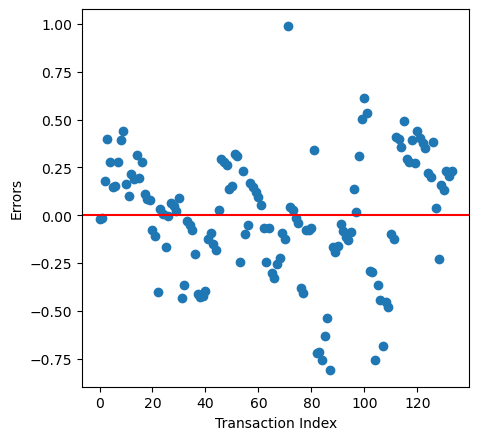

In [1617]:
# Plot residuals
plt.figure(figsize=(5,5), dpi=100)
plt.scatter(range(len(errors)),errors)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Transaction Index') 
plt.ylabel('Errors') 
plt.show()

The plot below assumes a normal or gaussian distribution. This is what we would expect to see when a regressional model accurately fits the data.

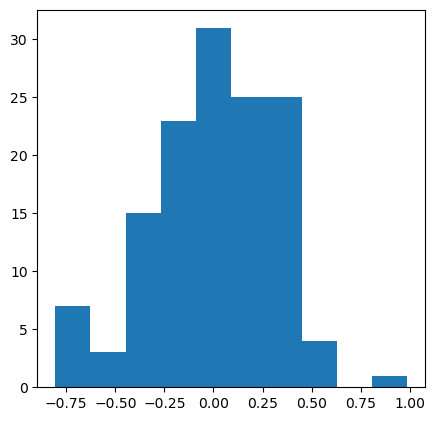

In [1618]:
# Plot errors
plt.figure(figsize=(5,5), dpi=100)
plt.hist(error)
plt.show()

**Logistic Regression**
<br>Logistic regression is typically used to predict the probability of default by a business using financial ratios and matrics. However, with this assignment the dataset we're working with is better suited towards understanding and predicting cashflow. In fact some research I came across proposed a cashflow based approach to estimating default probabilities **(Cifuentes  et al 2013)**. Below, we will explore a basic logistic regression model using cashresult as the outcome Y variable and numdebits as the independent X variable. Remember with the Y variable 0 represents a negative cash result after summing debits and credits while 1 representing a positive cashflow result.

**Plot X and Y Variables**
<br>Prior to modeling the data using logistic regression, we will explore and vizualize the Y and X variables we'll be working with. 

In [1619]:
def unique_count_barchart(values):
    """Returns a bar chart displaying count of each unique value in dataset feature"""
    unique_labels = values.unique()
    unique_labels_pos = list(range(len(unique_labels)))
    count_values = values.value_counts()
    plt.figure(1, figsize=(5, 5))
    plt.bar(unique_labels_pos, count_values)
    plt.xlabel(values.name)
    plt.ylabel("Count")
    plt.title("Count of Unique Values")
    plt.xticks(unique_labels_pos)
    return plt.show()

The below bar chart shows that TacT made zero debit transactions on approximately 45 or 33% of its total transaction days in 2020 (i.e 134). The business made 1 debit transaction on approximately 42 or 31% of its total transaction days in 2020. This means that 2 out of 3 transaction days, TacT is either making 1 or no debit transactions. I would expect that this would differ for businesses of different sizes and across different industries.

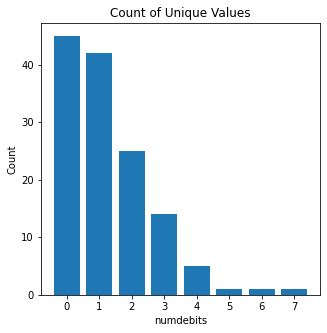

In [1620]:
unique_count_barchart(sumtrans2['numdebits'])

The below bar chart shows that 70 or 52% of transaction days for TacT in 2021 resulted in more cash being spent than received on it's bank account. The remaining 64 or 48% of transaction days result in a positive cashflow result.

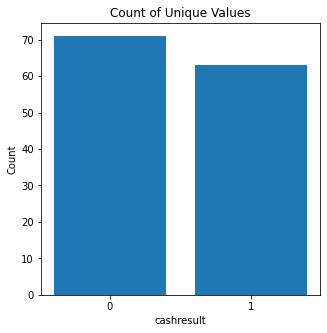

In [1621]:
unique_count_barchart(sumtrans2['cashresult'])

**Model Linear Relationship**
<br>Now that we've briefly explored the data at a high level, we will proceed with modelling. Logistic regression and linear regression both start with modelling the relationship between the independent x and outcome y variables. 

In [1622]:
# Define x and y variables
x = sumtrans2['numdebits'] 
y = sumtrans2['cashresult']

In [1623]:
# Define linear model a and b values
b, a, r_value, p_value, std_err = linregress(x, y)

**Define Linear and Sigmoid Functions**
<br>Logistic regression makes use of the sigmoid function to convert predicted Y outcome variables into probabilities between 1 and 0.

In [1624]:
# Define sigmoid function
def sigmoid(x):
    """Convert the output produced by a linear model 
    into a probability between 0 and 1"""
    return 1.0/(1 + np.exp(-x))

In [1625]:
# Define linear model function
def linear_model(x):
    """Plugs x independent value into linear model 
    equation and returns y dependent value"""
    return b * x + a

**Generate Y Probability Values**
<br>Below we generate Y probability values by passing X values through the linear and sigmoid functions.

In [1626]:
y_linear = linear_model(x)
y_logistic = sigmoid(y_linear)

**Plot Probabilities Against Original Data**
<br>Below we plot the Y probabilities against the original Y values. If the model fits the data accurately, we would expect the plotted probabilities to assume an S shaped curve. Below we can see that this is not the case. If anything the plotted probabilities assume a linear relationship.

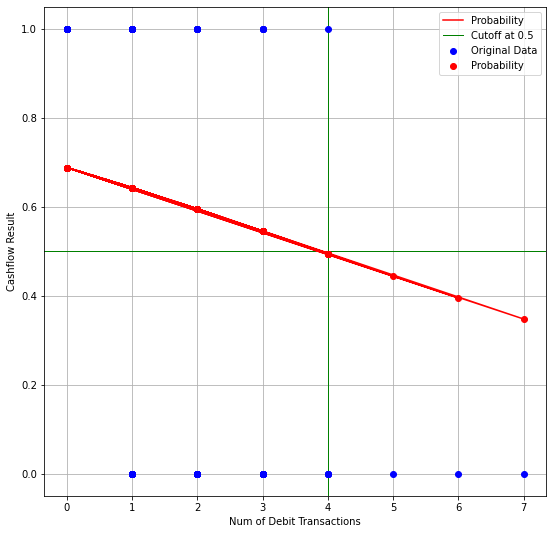

In [1627]:
plt.figure(1, figsize=(9, 9))
# Plot original Y values
plt.scatter(x, y, color='blue', label = 'Original Data', zorder=20)
# Plot probability Y values
plt.scatter(x, y_logistic, color='red', label = 'Probability', zorder=20)
plt.plot(x, y_logistic, color='red', label = 'Probability', zorder=20)
# Plot cut off point
plt.axvline(x=4,ymin=0,ymax=1,linewidth=1, color='green')
plt.axhline(y=0.5,xmin=0,xmax=6, label='Cutoff at 0.5', linewidth=1, color='green')
# Plot X and Y labels
plt.ylabel('Cashflow Result')
plt.xlabel('Num of Debit Transactions')
# Plot graph
plt.legend()
plt.grid()
plt.show()

**Key Statistical Measures**

<u>Univariate Logistic Regression</u>
<br>The below pseudo r-squared value of 0.093 in our univariate logistic regression model is very low. This suggest that only 9% of the variation in numdebits as our x independent variable determines the cashresult. We also have high AIC and BIC values. This suggests that our univariate model is not the best fit.

In [1628]:
# building the model and fitting the data 
log_reg = sm.Logit(y, x).fit() 

Optimization terminated successfully.
         Current function value: 0.626752
         Iterations 5


In [1629]:
# printing the summary table 
print(log_reg.summary2())

                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.093   
Dependent Variable: cashresult       AIC:              169.9695
Date:               2021-09-05 11:25 BIC:              172.8673
No. Observations:   134              Log-Likelihood:   -83.985 
Df Model:           0                LL-Null:          -92.643 
Df Residuals:       133              LLR p-value:      nan     
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     5.0000                                     
----------------------------------------------------------------
             Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
----------------------------------------------------------------
numdebits   -0.4565    0.1228  -3.7178  0.0002  -0.6971  -0.2158



<u>Multivariate Logistic Regression</u>
<br>I'm curious to see if we can obtain a better performing model by utilizing multiple independent variables.

In [1630]:
X = sumtrans2[['numtranstypes', 'numdebits', 'numcredits', 'sumcredits']]

In [1631]:
# building the model and fitting the data 
log_reg = sm.Logit(y, X).fit() 

Optimization terminated successfully.
         Current function value: 0.157535
         Iterations 9


 The below results shows that our multivariate regression model perform much better than our univariate model. The pseudo r-squared value shows significant improvement increasing from 0.093 to 0.77. Our AIC and BIC scores have dropped from 167 and 173 to 51.3 and 65.8 respectively. If we set our level of significance or alpha values equals to 0.05, we can see that the p values of the 4 x indepedent values are below this threshold. This means that to a greater or lesser degree these independent variables are important in determining the cashresult y dependent variable.

In [1632]:
print(log_reg.summary2())

                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.772     
Dependent Variable: cashresult       AIC:              50.2195   
Date:               2021-09-05 11:25 BIC:              61.8109   
No. Observations:   134              Log-Likelihood:   -21.110   
Df Model:           3                LL-Null:          -92.643   
Df Residuals:       130              LLR p-value:      8.2474e-31
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     9.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
numtranstypes     -1.8326   0.7898 -2.3204 0.0203 -3.3805 -0.2847
numdebits         -1.7178   0.4932 -3.4831 0.0005 -2.6844 -0.7512
numcredits         5.3909   1.3443  4.0101 0.0001  2.7561  8.0257
sumcredits         0.0006   0.0002  

### Feature Selection ###
Based on the two modelling techniques explored above, I am more confident in the results achieved by our univariate linear regression model. As such, I choose to focus on this technique for the remainder of this assisgnment.The linear regression model we explored only used 1 predictor variable (i.e. univariate model). I'm curious to find out whether we can create a more accurate model with less errors using multiple independent predictor variables. The key question here is what features would be the most appropriate to use? 

**Create Train and Test Datasets**
<br>We will first split the sumtrans2 dataset into tain and split subsets for feature selection and model training. For our X independent variables, I select 8 features from transindex to sumcredits. I'm interested in finding out which combination of these features can be determine cashbalance our y outcome variable.

In [1633]:
# Select independent X and y dependent variables for multivariate regression modelling
X = sumtrans2.iloc[:,1:9]
y = sumtrans2['cashbalance']

Next I standardize our variables

In [1634]:
# Standardize X and y variables
for col in X.columns:
    X[col] = standardize(X[col])

y = standardize(y)

I would like to use 50% of the available data for training our model and the remainder for testing.

In [1635]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=None)

**Feature Selection Framework**
<br>During my research, I came across the following feature selection framework **(Brownlee, 2019)**. With regression modeling both our input and output variables will be numerical; of int or float value type. As such, I have decided to use Pearson’s Correlation Coefficient as my feature selection method of choice using the f_regression() function from the sklearn library.

<img src="images/feature_select_framework.png">

Below we define a function **(Brownlee, 2019)** called select features. The function accepts x training, y training and x testing data. It will then use the SelectKBest() function to determine which top 3 features (k=3) best model the best linear relationship between our indepedent x and y variables. Finally, the function transforms and returns our x training and x testing data inaddition to feature selection scores.

In [1636]:
def select_features(X_train, y_train, X_test):
    # configure to select top 3 features
    fs = SelectKBest(score_func=f_regression, k=3)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

**Feature Selection Scores**

We now pass our X train, Y train and X test datasets to the select_features function **(Brownlee, 2019)**. We also write code **(Brownlee, 2019)** that prints out a score for each feature in our X train dataset. From the results below, we see that transindex (feature 0), transmonth (feature 1) and numdebits (feature 4) are the most important features with the highest scores.

Feature 0: 554.506887
Feature 1: 599.267387
Feature 2: 0.059095
Feature 3: 0.305387
Feature 4: 0.088455
Feature 5: 0.005757
Feature 6: 0.265774
Feature 7: 1.405278


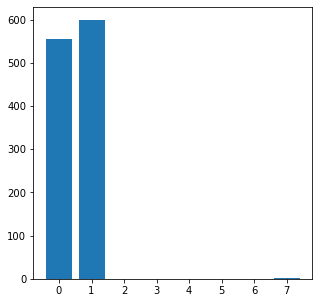

In [1637]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.figure(1, figsize=(5, 5))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

### Model Training ###
Below we use the linear_model function sklearn library to train our multivariate linear regression model. We use the x training data set returned from the select_features function **(Brownlee, 2019)** which contains the top three scoring features.

In [1638]:
# Create regression object
reg = LinearRegression()

# Train model using training sets
reg.fit(X_train_fs, y_train)

LinearRegression()

### Model Predictions ###

After training our model, we calculate our y predictions, residuals and key metrics.

In [1639]:
# Obtain predictions using the testing set
y_pred = reg.predict(X_test_fs)

In [1640]:
# Compute residuals
residuals = (y_test - y_pred)

In [1641]:
# Calculate Squared Error
SE = residuals**2
# Calculate Mean Squared Error
MSE = np.mean(SE)
# Calculate Root Mean Squared Error
RMSE = np.sqrt(MSE)

In [1642]:
print("Root mean squared error (RMSE):", RMSE)

Root mean squared error (RMSE): 0.3138807616302967


Our multivariate linear regression model shows only minimal improvement compared to our earlier univariate model. Our r squared value has increased from 0.9 to 0.91. Additionally, our AIC and BIC values have decreased from 72 and 75 to 23 and 29 respectively. Looking at our p values, we can see that two out of our 3 selected model features (x2 and x3) are statistically significant. The other feature (x1) is just above our alpha value of 0.05. 

In [1643]:
mod = sm.OLS(y_train,X_train_fs)
model = mod.fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
==============================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.916   
Dependent Variable:     cashbalance      AIC:                         23.2538 
Date:                   2021-09-05 11:26 BIC:                         29.8679 
No. Observations:       67               Log-Likelihood:              -8.6269 
Df Model:               3                F-statistic:                 243.1   
Df Residuals:           64               Prob (F-statistic):          6.40e-35
R-squared (uncentered): 0.919            Scale:                       0.079298
------------------------------------------------------------------------------------
          Coef.        Std.Err.         t          P>|t|         [0.025       0.975]
------------------------------------------------------------------------------------
x1        0.1894         0.3870       0.4894       0.6263       -0.5837       0.9625
x2        0.7570         0.3895       1.9436       0.0563       -0.0211       1.5352
x3        0.1057         0.0290       3.6446       0.0005        0.0478       0.1637
------------------------------------------------------------------------------
Omnibus:                  2.635             Durbin-Watson:               1.832
Prob(Omnibus):            0.268             Jarque-Bera (JB):            1.948
Skew:                     -0.244            Prob(JB):                    0.378
Kurtosis:                 2.322             Condition No.:               22   
==============================================================================

"""

### Evaluation ###

**Insights and Results**
<br>My main goal when I initially started this project was to develop an alternative credit scoring model for SMEs in the Caribbean Netherlands using bank transactions. The research and work I've done so far on this project has informed me that although this goal is ambitious and not achievable in the time frame I had imagined, it is possibly attainable. More specfic to this project, I would state the following as the key insights I developed;

1) It is probably impossible to create an alternative credit scoring model for SMEs using only bank transactions. Additional contextual information is needed with regards to the business type, size and other key characteristics. Additional alternative data and sources of information would be useful in building this more complete contextual picture.

2) Not withstanding the above, bank transactions combined with regression algorithms can be used with a high degree of accuracy to model and predict the cashflow of an SME. Cashflow is arguably one of the most important factor for lenders in determining whether to extend credit to an applicant. It it very promising that linear regression modelling showed promising results with the dataset I had available to work with. Multivariate logistic regression modelling also provided promising results and warrants further exploration.


3) Feature engineering is a very important step in maximizing the value that can be derived from bank transactions or any alernative data source for that matter. This insight was emphasized both in the research that I conducted and also in working with the dataset available to me.

**Further Work Required**
<br>I plan to continue working on this project after this assisgnment. Below, I outline some of the research and other areas of work that I would like to carry out;

1) Obtain a larger dataset with transactions from several SMEs. A larger dataset would allow for building a better credit scoring model that encompasses a wider range of SME's financial transactions. This will also allow me to test and hopefully validate the classification and regression modeling techniques used in this assignment. (Kenyatta, 2021). Unfortunately, I was not able to acheive this aim at this stage of the project.

2) Research and make us of alternative data sources that can be combined with the bank transactions of an SME to create a more complete picture of their loan repayment ability and overall creditworthiness. In particular, I would like to continue down the line of research of cash flow based credit scoring models.


3) Finally, I would like to apply more advance statistical and machine learning techniques. This will help not only with feature engineering and selection but also with modeling and evaluation of results.

### References ###

<br>ASTRI, 2 November 2020. ASTRI publishes white paper on alternative credit scoring of MSMEs. Available at: https://www.astri.org/news-detail/astri-publishes-white-paper-on-alternative-credit-scoring-of-msmes/ Accessed: 20th August 2021<br>

<br>Baesens et al, 2005. Linear and Non-linear Credit Scoring by Combining Logistic Regression and Support Vector Machines. Available at: https://www.researchgate.net/publication/251376222_Linear_and_Non-linear_Credit_Scoring_by_Combining_Logistic_Regression_and_Support_Vector_Machines Accessed: 20th August 2021<br>

<br>Brownlee, 27 November 2019. How to Choose a Feature Selection Method For Machine Learning. Available at: https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/ Accessed: 3rd September 2021<br>

<br>Bruce, Bruce and Gedeck 2020. Practical Statistics for Data Scientists 2nd edition. Boston: O'Reilly<br>

<br>CBPBES, 2021. Personal Data Protection Act BES. Available at: https://cbpbes.com/privacy/wet-wbpbes/ Accessed: 15th August 2021<br>

<br>Cifuentes  et al 2013. A Cash Flow-Based Approach to Estimate Default Probabilities. Available at: http://www.crem.uchile.cl/cremuchile/wp-content/uploads/2014/01/CREM-2013-N%C2%BA2-A-Cash-Flow-Based-Approach-to-Estimate-Default-Probabilities.pdf Accessed: 1 Septepmber 2021<br>

<br>(EUR-LEX, 2021). General Data Protection Regulation. Available at: https://gdpr-info.eu/ Accessed: 15th August 2021<br>

<br>(Gallo, 16 Feburary 2016). A Refresher on Statistical Significance. Available at: https://hbr.org/2016/02/a-refresher-on-statistical-significance Accessed: 29th August 2021<br>

<br>(Hayes, 15 April 2021). Null Hypothesis. Available at: https://www.investopedia.com/terms/n/null_hypothesis.asp Accessed: 29th August 2021<br>

<br>Kenyatta (2021). Creditworthiness of Caribbean Netherlands SMEs: measuring the financial ability and responsibility of SMEs in the Caribbean Netherlands to borrow and repay micro loans. Available at: https://colab.research.google.com/drive/1r1uOr1jWwpbjtnxn-cJEN1sWdM3MFdW2#scrollTo=N0IqFnp5OvQq Accessed: 23rd August 2021

<br>(Kenton, 27 July 2021). Default Probability. Available at: https://www.investopedia.com/terms/d/defaultprobability.asp Accessed: 20th August 2021<br>

(Luber, 23 July 2021). Bank Transaction Data Can Help the Underserved. Available at:  https://www.equifax.com/newsroom/all-news/-/story/bank-transaction-data-can-help-the-underserved-6/ Accessed: 20th August 2021<br>

<br>McKinney, W. (2017). Python for Data Analysis 2nd edition. Boston: O'Reilly<br>

<br>(Sadawi, 2021). Statistics and statistical mining (DSM030-2021-APR). Available at: https://learn.london.ac.uk/course/view.php?id=212&section=7 Accessed: 29th August 2021<br>

<br>Summerfield, M (2010). Programming in Python 3: A Complete Introduction to the Python Language 2nd edition. Addison-Welsey<br>

<br>(Vasile, 12 January 2020). What’s the best way to handle NaN values? Available at: https://towardsdatascience.com/whats-the-best-way-to-handle-nan-values-62d50f738fc Accessed: 21st August 2021<br>

<br>(Verkade, 17 April 2018). Credit scoring for small medium enterprises using transaction data. Available at:
https://repository.tudelft.nl/islandora/object/uuid%3A6ed89f2f-2c5f-4b85-859b-47a244da609b Accessed: 20th August 2021<br>

<br>(Zach, 2021). What is Considered a Good RMSE Value? Available at: https://www.statology.org/what-is-a-good-rmse/ Accessed: 30th August 2021<br>
